## Table of Contents

1. [Introduction]( introduction)
2. [Data Overview]( data-overview)
   - 2.1. Number of Tested Isolates
   - 2.2. Number of Features
3. [Unique Feature Values]( unique-feature-values)
   - 3.1. Categorical Features
   - 3.2. Numerical Features
4. [Histograms of Numerical Feature Distributions]( histograms-of-numerical-feature-distributions)
5. [Correlations and Simple Dependencies]( correlations-and-simple-dependencies)
6. [Conclusions and Insights]( conclusions-and-insights)
7. [Analysis of Current Model Issues](analysis-of-current-model-issues)
<br>

---

## Introduction

Dataset from : [Antimicrobial resistance data](https://www.kaggle.com/datasets/amritpal333/antimicrobial-resistance-data/code)

Based on the presented data, the task is to predict the sensitivity and resistance of major microorganism types to specific drugs.

## Data Overview

    Number of Tested Isolates




In [47]:
from helpers.functions import calculate_total_n

file_paths = [

    # 2013
    
    # E-Coli
    r"AMR_datasets\2013\E-Coli\number-3GCREC-percentage-ESBL-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-combined-resistance-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-3-gen-cephalosporins-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-aminopenicilins-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-carbapenems-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-fluoroquinolones-2010-2013.xlsx",

    # Enterococci
    r"AMR_datasets\2013\Enterococci\number-e-faecalis-isolates-and-percentage-high-level-resistance-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\Enterococci\number-e-faecium-isolates-and-percentage-resistant-vancomycin-2010-2013.xlsx",

    # K-Pneumoniae
    r"AMR_datasets\2013\K-Pneumoniae\number-3GCRKP-percentage-ESBL-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-combined-resistance-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-3-gen-cephalosporins-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-carbapenems-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-fluoroquinolones-2010-2013.xlsx",

    # P-aeruginosa
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-combined-resistance-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-carbapenems-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-ceftazidime-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-fluoroquinolones-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-piperacillin-2010-2013.xlsx",

    # S-aureus
    r"AMR_datasets\2013\S-aureus\number-s-aureus-isolates-and-percentage-resistant-meticilin-2010-2013.xlsx",

    # S-pneumoniae
    r"AMR_datasets\2013\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-macrolides-2010-2013.xlsx",
    r"AMR_datasets\2013\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillin-2010-2013.xlsx",
    r"AMR_datasets\2013\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillins-macrolides-2010-2013.xlsx",


     # 2014
    
    #Acinetobacter
    r"AMR_datasets\2014\Acinetobacter\acinetobacter-resistance-combinations-2014.xlsx",

    # E-Coli
    r"AMR_datasets\2014\E-Coli\e-coli-resistance-combinations-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-3GCREC-percentage-ESBL-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-combined-resistance-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-aminoglycosides-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-carbapenems-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-cephalosporins-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-fluoroquinolones-2011-2014.xlsx",

    # Enterococci
    r"AMR_datasets\2014\Enterococci\number-e-faecalis-isolates-and-percentage-high-level-resistance-aminoglycosides-2011-2014.xlsx",
    r"AMR_datasets\2014\Enterococci\number-e-faecium-isolates-and-percentage-resistant-vancomycin-2011-2014.xlsx",

    # K-Pneumoniae
    r"AMR_datasets\2014\K-pneumoniae\k-pneumoniae-resistance-combinations-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-3GCRKP-percentage-ESBL-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-combined-resistance-2011-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-carbapenems-2011-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-cephalosporins-2011-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-fluoroquinolones-2011-2014.xlsx",

    # P-aeruginosa
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-combined-resistance-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-aminoglycosides-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-carbapenems-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-ceftazidime-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-fluoroquinolones-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-piperacillin-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\p-aeruginosa-resistance-combinations-2014.xlsx",

    # S-aureus
    r"AMR_datasets\2014\S-aureus\number-s-aureus-isolates-and-percentage-resistant-meticilin-2011-2014.xlsx",

    # S-pneumoniae
    r"AMR_datasets\2014\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-macrolides-2011-2014.xlsx",
    r"AMR_datasets\2014\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillin-2011-2014.xlsx",
    r"AMR_datasets\2014\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillins-macrolides-2011-2014.xlsx",


    #2015

    # Acinetobacter
    r"AMR_datasets\2015\Acinetobacter, Tables 3-21 to 3-25.xlsx",

    # E-Coli
    r"AMR_datasets\2015\E-coli, Tables 3-1 to 3-7.xlsx",

    # Enterococci
    r"AMR_datasets\2015\Enterococci, Tables 3-30 and 3-31.xlsx",

    # K-Pneumoniae
    r"AMR_datasets\2015\Klebsiella, Tables 3-8 to 3-13.xlsx",

    # P-aeruginosa
    r"AMR_datasets\2015\Pseudomonas, Tables 3-14 to 3-20.xlsx",

    # S-aureus
    r"AMR_datasets\2015\Staphylococcus, Table 3-29.xlsx",

    # S-pneumoniae
    r"AMR_datasets\2015\Streptococcus, Tables 3-26 to 3-28.xlsx",
]


calculate_total_n(file_paths)


Total number of tested isolates throughout 2010-2015 : 5006801.0



## Number of Features

1. **Year**  
   - **Type**: Numerical  
   - **Description**: Year of the study or data collection.  

2. **Country**  
   - **Type**: Categorical  
   - **Description**: Country where the data was collected.  

3. **Microorganism**  
   - **Type**: Categorical  
   - **Description**: The type of microorganism.  

4. **Antimicrobial group**  
   - **Type**: Categorical  
   - **Description**: Group of antimicrobial drugs tested against the microorganism (also ).  

5. **N (Total number of invasive isolates tested)**  
   - **Type**: Numerical  
   - **Description**: Total number of microorganism isolates tested for resistance to a specific antimicrobial group.  

6. **%R (Percentage resistance)**  
   - **Type**: Numerical  
   - **Description**: Percentage of microorganism isolates resistant to a specific antimicrobial group.  
   - **Target variable**: Numerical forecast indicator.

7. **95% CI (Confidence interval)**  
   - **Type**: Numerical range with spliting into lower and upper bounds.
   - **Description**: Confidence interval for the percentage resistance (%R), indicating the range of statistical uncertainty.  

8. **Gender (Male/Female)**
   - **Type**: Binary.
   - **Description** : Gender of testee.


## Unique Feature Values

### Categorical Features

Country : 30

    'Belgium' 'Finland' 'Sweden' 'Ireland' 'Denmark' 'Netherlands'
    'United Kingdom' 'Germany' 'Norway' 'Malta' 'France' 'Austria'
    'Czech Republic' 'Slovakia' 'Portugal' 'Slovenia' 'Spain' 'Hungary'
    'Latvia' 'Bulgaria' 'Italy' 'Romania' 'Cyprus' 'Poland' 'Croatia'
    'Lithuania' 'Greece' 'Estonia' 'Iceland' 'Luxembourg'

<br>

Microorganism : 7

    'Escherichia coli' 'Klebsiella pneumoniae' 'Pseudomonas aeruginosa'
    'Acinetobacter species' 'Streptococcus pneumoniae' 'Staphylococcus aureus' 'Enterococci'

<br>

Antimicrobical group : 13

    'Piperacillin+tazobactam' 'Ceftazidime' 'Fluoroquinolones' 'Aminoglycosides'
    'Carbapenems' 'Meticillin' 'Penicillin' 'Aminopenicillins' 'Gentamicin'
    'Macrolides' 'Vancomycin' 'Third-generation cephalosporins' 'Penicillins'




### Numerical Features

Year : 6

    '2010' '2011' '2012' '2013' '2014' '2015'

<br>

N : Finite

    'From 0 to +∞'

<br>

%R : Finite

    'From 0 to 100%'

<br>

95% CI : The size of the interval decreases as the amount of data increases.
    
    'From -∞ to +∞'

<br>

Gender : 2.
    
    '0 or 1'
## Histograms of Numerical Feature Distributions

     Tested isolates by percentage of resistance :


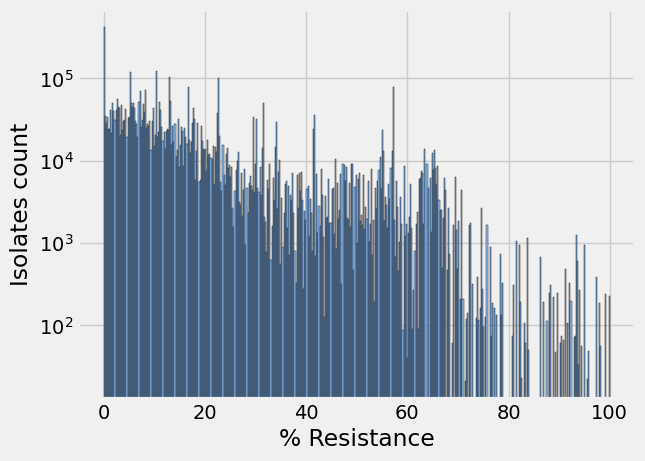

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from helpers.functions import getResistancePercentages
plt.style.use('fivethirtyeight')

file_paths = [

    #2013
    
    #E-Coli
    r"AMR_datasets\2013\E-Coli\number-3GCREC-percentage-ESBL-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-combined-resistance-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-3-gen-cephalosporins-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-aminopenicilins-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-carbapenems-2010-2013.xlsx",
    r"AMR_datasets\2013\E-Coli\number-e-coli-isolates-and-percentage-resistant-fluoroquinolones-2010-2013.xlsx",

    #Enterococci
    r"AMR_datasets\2013\Enterococci\number-e-faecalis-isolates-and-percentage-high-level-resistance-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\Enterococci\number-e-faecium-isolates-and-percentage-resistant-vancomycin-2010-2013.xlsx",

    #K-Pneumoniae
    r"AMR_datasets\2013\K-Pneumoniae\number-3GCRKP-percentage-ESBL-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-combined-resistance-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-3-gen-cephalosporins-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-carbapenems-2010-2013.xlsx",
    r"AMR_datasets\2013\K-Pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-fluoroquinolones-2010-2013.xlsx",

    #P-aeruginosa
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-combined-resistance-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-aminoglycosides-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-carbapenems-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-ceftazidime-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-fluoroquinolones-2010-2013.xlsx",
    r"AMR_datasets\2013\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-piperacillin-2010-2013.xlsx",

    #S-aureus
    r"AMR_datasets\2013\S-aureus\number-s-aureus-isolates-and-percentage-resistant-meticilin-2010-2013.xlsx",

    #S-pneumoniae
    r"AMR_datasets\2013\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-macrolides-2010-2013.xlsx",
    r"AMR_datasets\2013\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillin-2010-2013.xlsx",
    r"AMR_datasets\2013\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillins-macrolides-2010-2013.xlsx",


       #2014
    
    #Acinetobacter
    r"AMR_datasets\2014\Acinetobacter\acinetobacter-resistance-combinations-2014.xlsx",

    #E-Coli
    r"AMR_datasets\2014\E-Coli\e-coli-resistance-combinations-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-3GCREC-percentage-ESBL-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-combined-resistance-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-aminoglycosides-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-carbapenems-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-cephalosporins-2011-2014.xlsx",
    r"AMR_datasets\2014\E-Coli\number-e-coli-isolates-and-percentage-resistant-fluoroquinolones-2011-2014.xlsx",

    #Enterococci
    r"AMR_datasets\2014\Enterococci\number-e-faecalis-isolates-and-percentage-high-level-resistance-aminoglycosides-2011-2014.xlsx",
    r"AMR_datasets\2014\Enterococci\number-e-faecium-isolates-and-percentage-resistant-vancomycin-2011-2014.xlsx",

    #K-Pneumoniae
    r"AMR_datasets\2014\K-pneumoniae\k-pneumoniae-resistance-combinations-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-3GCRKP-percentage-ESBL-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-combined-resistance-2011-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-carbapenems-2011-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-cephalosporins-2011-2014.xlsx",
    r"AMR_datasets\2014\K-pneumoniae\number-k-pneumoniae-isolates-and-percentage-resistant-fluoroquinolones-2011-2014.xlsx",

    #P-aeruginosa
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-combined-resistance-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-aminoglycosides-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-carbapenems-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-ceftazidime-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-fluoroquinolones-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\number-p-aeruginosa-isolates-and-percentage-resistant-piperacillin-2011-2014.xlsx",
    r"AMR_datasets\2014\P-aeruginosa\p-aeruginosa-resistance-combinations-2014.xlsx",

    #S-aureus
    r"AMR_datasets\2014\S-aureus\number-s-aureus-isolates-and-percentage-resistant-meticilin-2011-2014.xlsx",

    #S-pneumoniae
    r"AMR_datasets\2014\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-macrolides-2011-2014.xlsx",
    r"AMR_datasets\2014\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillin-2011-2014.xlsx",
    r"AMR_datasets\2014\S-pneumoniae\number-s-pneumoniae-isolates-and-percentage-non-susceptible-penicillins-macrolides-2011-2014.xlsx",


    #2015

    #Acinetobacter
    r"AMR_datasets\2015\Acinetobacter, Tables 3-21 to 3-25.xlsx",

    #E-Coli
    r"AMR_datasets\2015\E-coli, Tables 3-1 to 3-7.xlsx",

    #Enterococci
    r"AMR_datasets\2015\Enterococci, Tables 3-30 and 3-31.xlsx",

    #K-Pneumoniae
    r"AMR_datasets\2015\Klebsiella, Tables 3-8 to 3-13.xlsx",

    #P-aeruginosa
    r"AMR_datasets\2015\Pseudomonas, Tables 3-14 to 3-20.xlsx",

    #S-aureus
    r"AMR_datasets\2015\Staphylococcus, Table 3-29.xlsx",

    #S-pneumoniae
    r"AMR_datasets\2015\Streptococcus, Tables 3-26 to 3-28.xlsx",
]
resistances_filtered = getResistancePercentages(file_paths)
plt.style.use('seaborn-v0_8-pastel')
plt.hist(resistances_filtered, bins="auto", edgecolor='black', linewidth=0.3, log=True)

plt.xlabel("% Resistance")
plt.ylabel("Isolates count")
plt.show()

     Tested isolates by year :

   Correlations and Simple Dependencies


   Conclusions and Insights